# Mini Project for Data Science & Data Analyst (Digital Skill Fair 39.0) by dibimbingid

Dataset: Fashion Retail Sales

Source: https://www.kaggle.com/datasets/atharvasoundankar/fashion-retail-sales

Customer Reference ID: ID untuk setiap pelanggan.

Item Purchased	: Nama barang yang dibeli oleh pelanggan.

Purchase Amount (USD): Harga barang yang dibeli dalam USD.

Date Purchase: Tanggal pembelian dilakukan (format: DD-MM-YYYY).

Review Rating: Rating ulasan dari pelanggan.

Payment Method: Metode pembayaran yang digunakan.

# Read data

In [40]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Membaca data dari upload file
df = pd.read_csv('/content/Fashion_Retail_Sales.csv')

In [42]:
# Menampilkan 5 data teratas dan 5 data terakhir
df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash


# Exploratory Data Analysis (EDA)

In [43]:
# Menampilkan jumlah baris dan kolom
df.shape

(3400, 6)

In [44]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


Observasi:

Pada kolom Date Purchase memiliki tipe data object, sehingga harus dilakukan perubahan tipe data menjadi date.



In [45]:
# Mengubah kolom Date Purchase ke tipe data date
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y')

In [46]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  3400 non-null   int64         
 1   Item Purchased         3400 non-null   object        
 2   Purchase Amount (USD)  2750 non-null   float64       
 3   Date Purchase          3400 non-null   datetime64[ns]
 4   Review Rating          3076 non-null   float64       
 5   Payment Method         3400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.5+ KB


In [47]:
# Identifikasi data unik
df.nunique()

,0
Customer Reference ID,166
Item Purchased,50
Purchase Amount (USD),234
Date Purchase,365
Review Rating,41
Payment Method,2


In [48]:
# Cek isi kategori dari atribut yang ada
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()):
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Item Purchased : ['Handbag' 'Tunic' 'Tank Top' 'Leggings' 'Wallet' 'Onesie' 'Jacket'
 'Trousers' 'Jeans' 'Loafers' 'Slippers' 'Bowtie' 'Pajamas' 'Trench Coat'
 'Poncho' 'Gloves' 'Romper' 'T-shirt' 'Flip-Flops' 'Shorts' 'Blazer'
 'Boots' 'Belt' 'Hoodie' 'Sweater' 'Blouse' 'Swimsuit' 'Kimono' 'Cardigan'
 'Socks' 'Pants' 'Scarf' 'Backpack' 'Dress' 'Camisole' 'Sneakers'
 'Flannel Shirt' 'Tie' 'Polo Shirt' 'Umbrella' 'Hat' 'Sun Hat' 'Overalls'
 'Coat' 'Sunglasses' 'Vest' 'Sandals' 'Jumpsuit' 'Raincoat' 'Skirt']
Payment Method : ['Credit Card' 'Cash']


## Missing value

In [49]:
# Cek missing value
df.isnull().sum()

,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


Observasi:

Terdapat dua kolom yang memiliki missing value, yaitu Purchase Amount (USD) dan Review Rating, sehingga harus dilakukan handling missing value untuk kedua kolom.

In [50]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

In [51]:
# Cek missing value
df.isnull().sum()

,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),0
Date Purchase,0
Review Rating,0
Payment Method,0


In [52]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  3400 non-null   int64         
 1   Item Purchased         3400 non-null   object        
 2   Purchase Amount (USD)  3400 non-null   float64       
 3   Date Purchase          3400 non-null   datetime64[ns]
 4   Review Rating          3400 non-null   float64       
 5   Payment Method         3400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.5+ KB


In [53]:
# Cek data duplikat
duplicates = df.duplicated().sum()
print(duplicates)

0


In [54]:
# Telaah data secara statistik deskriptif/rincian data
df.describe()

,Customer Reference ID,Purchase Amount (USD),Date Purchase,Review Rating
count,3400.000000,3400.000000,3400,3400.000000
mean,4039.660588,156.709818,2023-04-01 01:40:22.588235520,2.999057
min,3957.000000,10.000000,2022-10-02 00:00:00,1.000000
25%,3997.000000,70.000000,2022-12-31 00:00:00,2.100000
50%,4040.000000,132.000000,2023-04-03 00:00:00,2.999057
75%,4081.000000,156.709818,2023-07-02 00:00:00,3.900000
max,4122.000000,4932.000000,2023-10-01 00:00:00,5.000000
std,48.122583,377.295576,NaN,1.100005


## Outliers

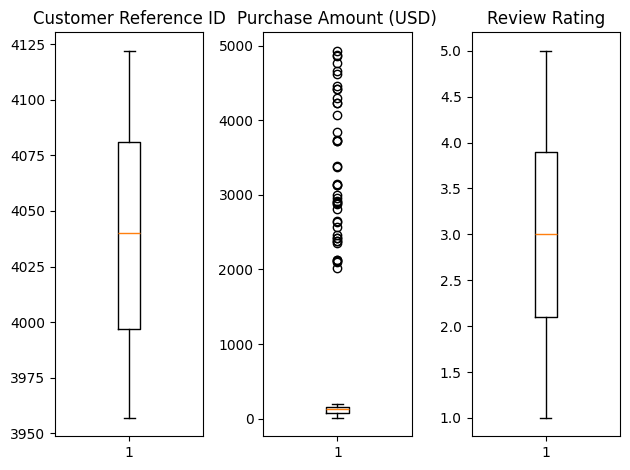

In [55]:
# Visualisasi boxplot untuk outlier
numerical_df = df.select_dtypes(include=['number'])
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(numerical_df['Customer Reference ID'])
axs[0].set_title("Customer Reference ID")

axs[1].boxplot(numerical_df['Purchase Amount (USD)'])
axs[1].set_title("Purchase Amount (USD)")

axs[2].boxplot(numerical_df['Review Rating'])
axs[2].set_title("Review Rating")

plt.tight_layout()
plt.show()

Observasi:

Pada kolom Purchase Amount (USD) memiliki outliers, sehingga harus dilakukan handling outliers.

In [56]:
# Mencari outliers dengan IQR
def detect_outliers(df, *cols):
  for x in cols:
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    df[x] = np.where(df[x]< Q1, IQR, df[x])
    df[x] = np.where(df[x]> Q3 , IQR, df[x])
  return 0

# Menjalankan fungsi mengurangi outlier
detect_outliers(df, 'Purchase Amount (USD)')

0

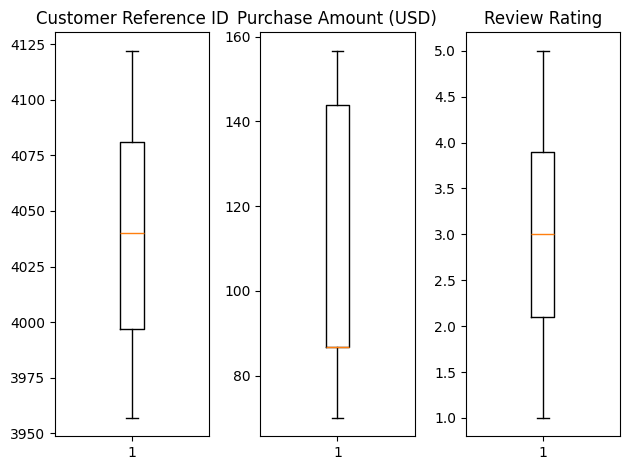

In [57]:
# Visualisasi boxplot untuk outlier
numerical_df = df.select_dtypes(include=['number'])
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(numerical_df['Customer Reference ID'])
axs[0].set_title("Customer Reference ID")

axs[1].boxplot(numerical_df['Purchase Amount (USD)'])
axs[1].set_title("Purchase Amount (USD)")

axs[2].boxplot(numerical_df['Review Rating'])
axs[2].set_title("Review Rating")

plt.tight_layout()
plt.show()

# Data visualization

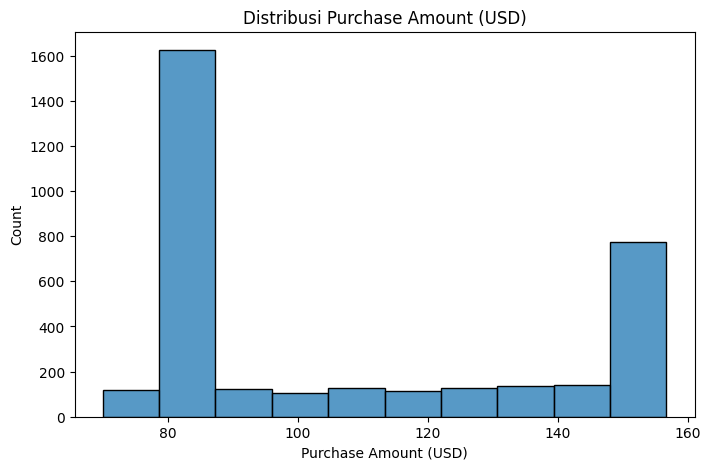

In [58]:
# Visualisasi distribusi dari harga barang
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase Amount (USD)'], bins=10, kde=False, palette="ch:s=.25,rot=-.25")
plt.title('Distribusi Purchase Amount (USD)')
plt.show()

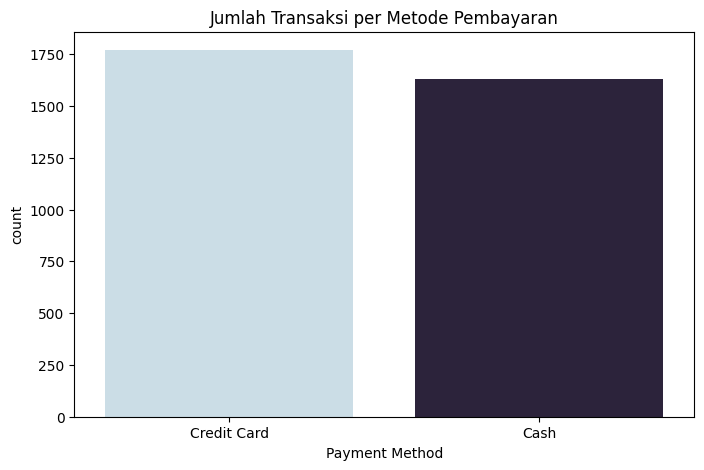

In [59]:
# Visualisasi jumlah transaksi per metode pembayaran
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment Method', data=df, palette="ch:s=.25,rot=-.25")
plt.title('Jumlah Transaksi per Metode Pembayaran')
plt.show()

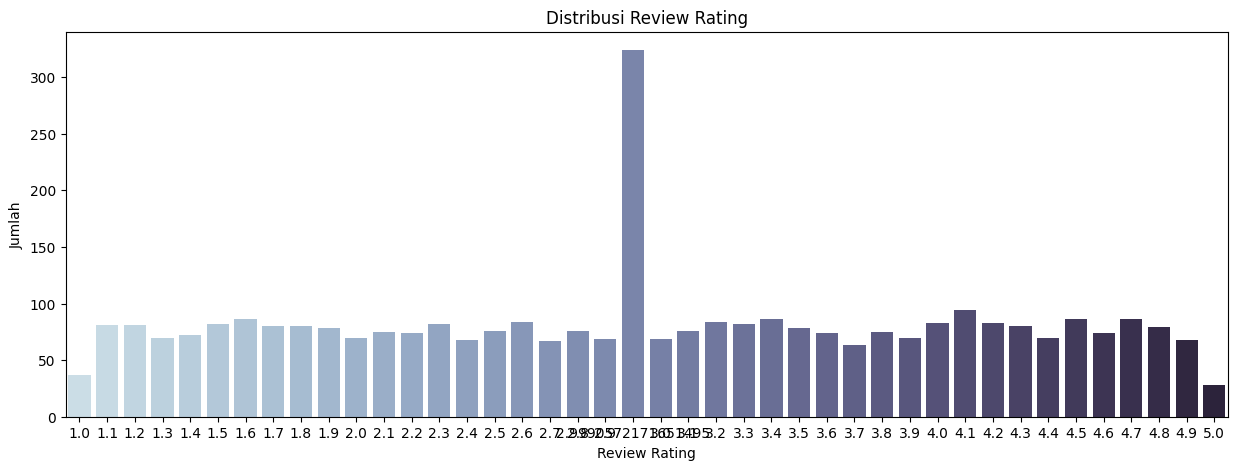

In [60]:
# Visualisasi distribusi dari review rating pelanggan
plt.figure(figsize=(15, 5))
sns.countplot(x='Review Rating', data=df, palette="ch:s=.25,rot=-.25")
plt.xlabel('Review Rating')
plt.ylabel('Jumlah')
plt.title('Distribusi Review Rating')
plt.show()

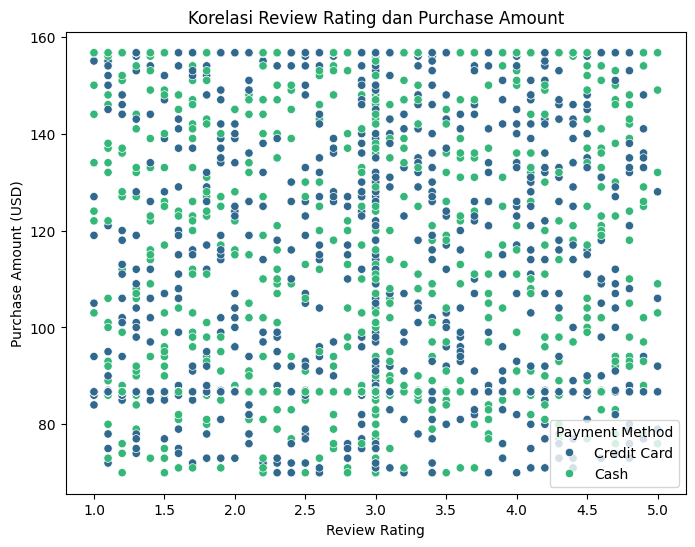

In [61]:
# Visualisasi korelasi antara review rating dan purchase amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Review Rating', y='Purchase Amount (USD)', hue='Payment Method', palette='viridis')
plt.title('Korelasi antara Review Rating dan Purchase Amount')
plt.show()

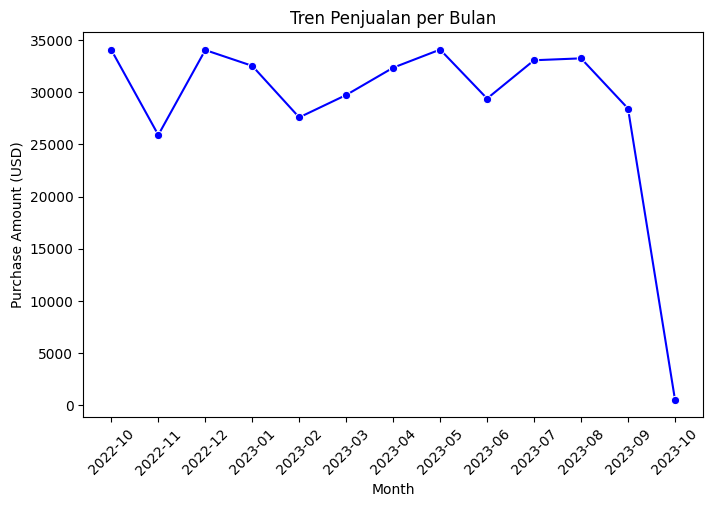

In [62]:
# Visualisasi tren penjualan per bulan
df['Month'] = df['Date Purchase'].dt.strftime('%Y-%m')
monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Purchase Amount (USD)', marker='o', color='blue')
plt.title('Tren Penjualan per Bulan')
plt.xticks(rotation=45)
plt.show()

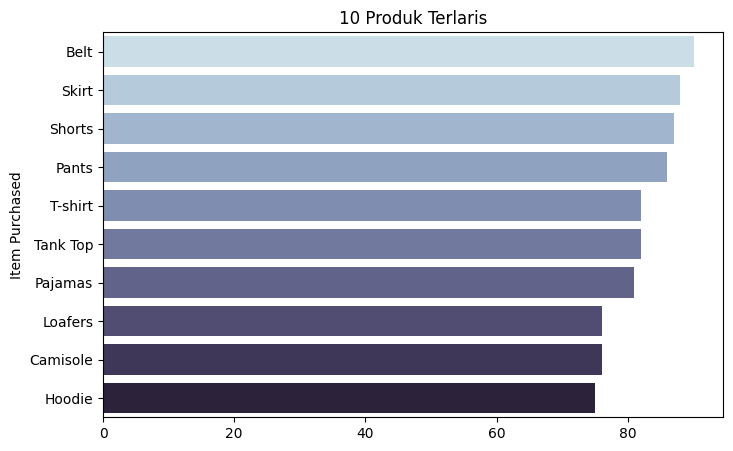

In [63]:
# Visualisasi 10 produk terlaris
top_products = df['Item Purchased'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=top_products.index, x=top_products.values, palette="ch:s=.25,rot=-.25")
plt.title('10 Produk Terlaris')
plt.show()